<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜:
* 이름:

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [43]:
xs = np.array([3, 5, 5, 7, 8])
ys = np.array([20, 50, 60, 90, 100])
xs.shape, ys.shape

((5,), (5,))

* 데이터 시각화

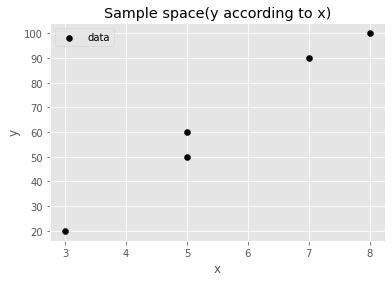

In [44]:
plt.scatter(xs, ys, c = 'k', label = 'data')
plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [45]:
def model_simple(x, w = 1):
    return x * w

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20|3|
|5|50|5|
|5|60|5|
|7|90|7|
|8|100|8|

In [46]:
model_simple(xs)

array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [47]:
# 순전파 
def propagation(xs, ys, w):
    total_loss = 0
    for x, y in zip(xs, ys): # 모든 샘플 x, y에 대해서
        y_pred = model_simple(x, w = w) # 예측값 구하기
        loss = np.abs(y_pred - y)
        total_loss += loss # 전체 샘플의 손실 구하기
        # print(f'x: {x}, y: {y}, y_pred: {y_pred}, loss: {loss}')
    return total_loss

total_loss = propagation(xs, ys,  w= 5)
print(f'total loss: {total_loss}')

total loss: 180


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


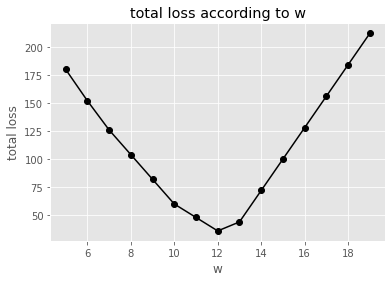

In [48]:
ws = np.arange(5,20)
total_losses = propagation(xs, ys, ws) # w값에 따른 total loss 배열 

# w 값에 따른 total loss 시각화
plt.plot(ws, total_losses, c = 'k', marker = 'o')
plt.title('total loss according to w')
plt.xlabel('w')
plt.ylabel('total loss')
# plt.legend()
plt.show()


### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [49]:
w_ = 12
propagation(xs, ys, w_)

36

* 학습 완료된 모델에 대한 예측 시각화

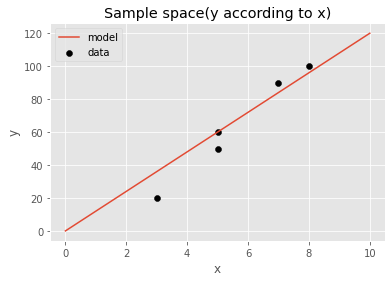

In [50]:
x_every = np.arange(11)
y_preds = model_simple(x_every, w_)

# 데이터 시각화 
plt.scatter(xs, ys, c = 'k', label = 'data')

# 모델 시각화
plt.plot(x_every, y_preds, label = 'model')

plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

* 공부시간이 6시간일 때 예상 점수는?


In [51]:
model_simple(6, w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [52]:
x_tests = np.array([1, 2, 5, 6, 7])
y_tests = np.array([5, 15, 55, 80, 85])
x_tests.shape, y_tests.shape

((5,), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [53]:
propagation(x_tests, y_tests, w_)

30

* 학습 완료된 모델에 테스트 데이터 예측 시각화

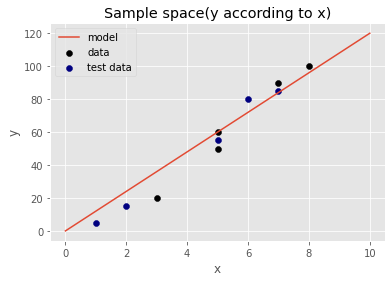

In [54]:
# 데이터 시각화 
plt.scatter(xs, ys, c = 'k', label = 'data')

# 모델 시각화
plt.plot(x_every, y_preds, label = 'model')

# 테스트 데이터 시각화
plt.scatter(x_tests, y_tests, label = 'test data', color = 'navy' )

plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [57]:
X = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
ys = np.array([20, 50, 60, 90, 100])
X.shape, ys.shape

((5, 2), (5,))

* 데이터 시각화

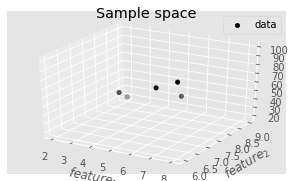

In [64]:
fig = plt.figure(figsize = (5,3))
ax = plt.axes(projection = '3d')

# x1(feature 1), x2(feature 2), y
x1s = X[ : ,0] # 모든샘플, 첫번째 피쳐
x2s = X[ :, 1]
ax.scatter3D(x1s, x2s, ys, label = 'data', c = 'k')

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')
plt.legend()
plt.show()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [73]:
def model_multi(x1, x2, w1 = 1, w2 = 1): #찾아야하는 학습파라미터가 2개
    return x1 * w1 + w2 * x2

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|11
|6|8|50|14
|4|7|60|11
|7|6|90|13
|8|6|100|14

In [79]:
x1s, x2s = X[:,0], X[:,1]
model_multi(x1s, x2s, w1 = 1, w2 = 1)

array([11, 14, 11, 13, 14])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [85]:
# 순전파 
def propagation(X, ys, w1, w2):
    total_loss = 0
    for x, y in zip(X, ys): # 모든 샘플 x, y에 대해서
        y_pred = model_multi(x[0], x[1], w1 = w1, w2 = w2) # 예측값 구하기
        loss = np.abs(y_pred - y)
        total_loss += loss # 전체 샘플의 손실 구하기
        # print(f'x: {x}, y: {y}, y_pred: {y_pred}, loss: {loss}')
    return total_loss

propagation(X, ys,  w1= 5, w2 = 5)
#print(f'total loss: {total_loss}')

115

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [86]:
w1s = np.arange(0, 30)
w2s = np.arange(-10, 10)
W1, W2 = np.meshgrid(w1s, w2s)

L = propagation(X, ys, W1, W2)
W1.shape, W2.shape, L.shape

((20, 30), (20, 30), (20, 30))

* 3d플롯으로 시각화

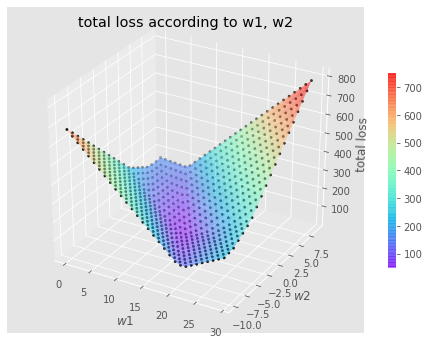

In [94]:
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection = '3d')

# w1, w2에 대한 loss 시각화 

ax.scatter3D(W1, W2, L, c = 'k', marker = '.')
surf = ax.plot_surface(W1, W2, L, cmap = 'rainbow', alpha = 0.5)
fig.colorbar(surf, shrink = 0.6)

ax.set_title('total loss according to w1, w2')
ax.set_xlabel('$w1$')
ax.set_ylabel('$w2$')
ax.set_zlabel('total loss')
# plt.legend()
plt.show()
plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [101]:
# L값이 최소값(45) 일 때, w1, w2의 값 
min_idx = np.argmin(L) # 최소값의 인덱스 반환 
print(min_idx)
w1_, w2_ = W1.flatten()[min_idx], W2.flatten()[min_idx] 
print(w1_, w2_, np.min(L))

283
13 -1 45


* 학습 완료된 모델의 최종 손실 계산

In [102]:
propagation(X, ys, w1_, w2_)

45

* 학습 완료된 모델에 대한 예측 시각화

In [106]:
x1_every = np.arange(10)
x2_every = np.arange(10)
X1_every, X2_every = np.meshgrid(x1_every, x2_every)
y_pred = model_multi(X1_every, X2_every, w1_, w2_)
X1_every.shape, X2_every.shape, y_pred.shape

((10, 10), (10, 10), (10, 10))

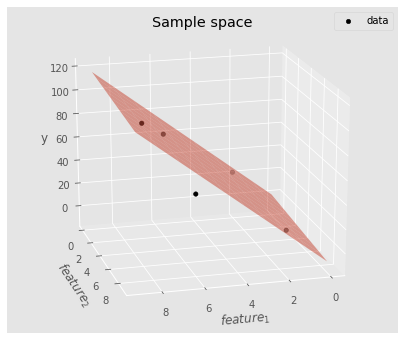

In [107]:
fig = plt.figure(figsize = (7,6))
ax = plt.axes(projection = '3d')

# x1(feature 1), x2(feature 2), y
x1s = X[ : ,0] # 모든샘플, 첫번째 피쳐
x2s = X[ :, 1]

# 데이터셋
ax.scatter3D(x1s, x2s, ys, label = 'data', c = 'k')

# 예측 모델
ax.plot_surface(X1_every, X2_every, y_pred, alpha = 0.5)

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')
ax.view_init(20, 75) # 상하 회전, 좌우 회전
plt.legend()
plt.show()
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [109]:
model_multi(6, 5, w1_, w2_)

73

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [113]:
x_tests = np.array([1, 7, 3, 8, 5, 7, 5, 6, 10, 7]).reshape(5,2)
y_tests = np.array([15, 25, 60, 90, 95])

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [114]:
propagation(x_tests, y_tests, w1_, w2_)

76

* 학습 완료된 모델에 테스트 데이터 예측 시각화

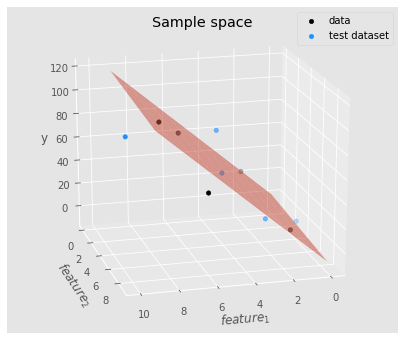

In [119]:
fig = plt.figure(figsize = (7,6))
ax = plt.axes(projection = '3d')

# x1(feature 1), x2(feature 2), y
x1s = X[ : ,0] # 모든샘플, 첫번째 피쳐
x2s = X[ :, 1]

# 데이터셋
ax.scatter3D(x1s, x2s, ys, label = 'data', c = 'k')

# 예측 모델
ax.plot_surface(X1_every, X2_every, y_pred, alpha = 0.5)

# 테스트 데이터 예측 시각화
ax.scatter3D(x_tests[:,0], x_tests[:,1], y_tests, c = 'dodgerblue', label = 'test dataset')

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')
ax.view_init(20, 75) # 상하 회전, 좌우 회전
plt.legend()
plt.show()

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [74]:
import numpy as np
import matplotlib.pyplot as plt

class Model(): # 모델 클래스가 생성됩니다.
    def __init__(self):
        self.w = 1
    def simple_model(self, xs, w = 1):
        return self.w * xs 
    def prop(self, xs, ys, w = 1):
        self.xs = xs
        self.ys = ys
        self.w = w
        total_loss = 0
        for x, y in zip(xs, ys):
            y_hat = self.simple_model(x, self.w)
            loss = np.abs(y_hat-y)
            total_loss+=loss
        return total_loss
    def fit(self, xs, ys): # 최적화가 진행됩니다.
        before = self.prop(xs, ys, w = self.w) + 1
        while True:
            total_loss = self.prop(xs, ys, w= self.w ) 
            if before > total_loss:
                before = total_loss
                self.w += 1
            elif before <= total_loss:
                self.w -=1
                break
        self.w_ = self.w
        return self.w_
    def predict(self, xs): # 예측을 진행합니다.
        return self.prop(xs, self.ys , self.w_)
    def validation(self, testx, testy): # 평가를 진행합니다.
        return self.prop(testx, testy, self.w_)

In [75]:
xs = np.array([3,5,5,7,8])
ys = np.array([20,50,60,90,100])
x_tests = np.array([1,2,5,6,7])
y_tests = np.array([5,15,55,80,85])
model = Model()

In [76]:
model.fit(xs, ys)

12

In [77]:
model.predict(xs)

36

In [78]:
model.validation(x_tests, y_tests)

30

#### 다른 코드

In [11]:
class SimpleModel():
  def __init__(self, random_state=1):
    self.w = 1
    self.loss = 10000

  def model(self, x, w):
    return w*x

  def propagation(self, xs, ys, w):
    total_loss = 0
    for x, y in zip(xs, ys):
      y_pred = self.model(x, w=w) 
      loss = np.abs(y_pred-y) 
      total_loss += loss 
    return total_loss/len(xs)
  
  def validation(self, x, y):
    loss = self.propagation(x, y, self.w)
    return loss

  def fit(self, x, y, grid=[-10,10]):
    for w in range(grid[0], grid[1]):
      loss_tmp = self.propagation(x, y, w)
      if self.loss > loss_tmp:
        self.loss = loss_tmp
        self.w = w
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}')
      else:
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}, stop learning')
        break
 
  def predict(self, x):
    pred = self.model(x, w=self.w)
    return pred

  def plot_xy(self, x, y):
    plt.scatter(x, y, c='k', label='data')
    plt.plot(x, self.model(x, self.w), c='r', label='model')
    plt.legend()
    plt.show()

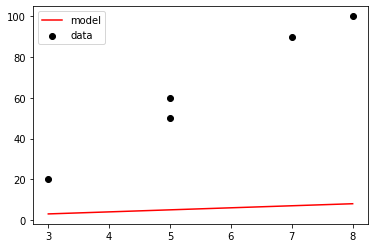

* 초기 예측값: [3 5 5 7 8]
* 초기 평가: 58.4
w: 0  loss:64.0
w: 1  loss:58.4
w: 2  loss:52.8
w: 3  loss:47.2
w: 4  loss:41.6
w: 5  loss:36.0
w: 6  loss:30.4
w: 7  loss:25.2
w: 8  loss:20.8
w: 9  loss:16.4
w: 10  loss:12.0
w: 11  loss:9.6
w: 12  loss:7.2
w: 13  loss:8.8, stop learning


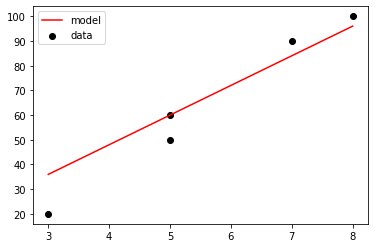

* 학습 후 예측값: [36 60 60 84 96]
* 학습 후 평가: 7.2


In [12]:
xs = np.array([3,5,5,7,8])
ys = np.array([20, 50, 60, 90, 100])

model = SimpleModel()
model.plot_xy(xs, ys)
print('* 초기 예측값:' , model.predict(xs))
print('* 초기 평가:', model.validation(xs, ys))

model.fit(xs, ys, [0, 15])
model.plot_xy(xs, ys)
print('* 학습 후 예측값:' , model.predict(xs))
print('* 학습 후 평가:', model.validation(xs, ys))